Label 0.0: 253721 voxels
Label 1.0: 697 voxels
Label 2.0: 435 voxels
Label 3.0: 492 voxels
Label 4.0: 30 voxels
Label 5.0: 36 voxels
Label 6.0: 4272 voxels
Label 7.0: 1367 voxels
Label 8.0: 304 voxels
Label 9.0: 209 voxels
Label 10.0: 107 voxels
Label 11.0: 9 voxels
Label 12.0: 19 voxels
Label 13.0: 110 voxels
Label 14.0: 212 voxels
Label 15.0: 124 voxels
Number of unique labels (including background): 16


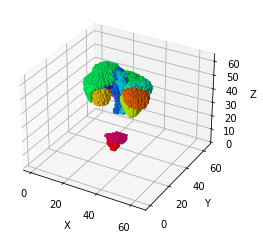

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import zoom
from matplotlib.colors import ListedColormap

def load_mask(mask_path):
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    return mask_data

# Downsample 3D array data to the target shape
def downsample(data, target_shape):
    zoom_factors = np.array(target_shape) / np.array(data.shape)
    downsampled_data = zoom(data, zoom_factors, order=0)
    return downsampled_data

# Specify mask file path
mask_path = 'C:/Users/Yugashree/Downloads/subset/label/amos_0001.nii'


mask_data = load_mask(mask_path)

# Specify target shape for downsampling
target_shape = (64, 64, 64)  # Adjust dimensions for better visibility

# Downsample mask
downsampled_mask = downsample(mask_data, target_shape)

# Get unique labels and their counts
unique_labels, counts = np.unique(downsampled_mask, return_counts=True)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} voxels")

# Number of labels including background (if present)
num_labels = len(unique_labels)
print(f"Number of unique labels (including background): {num_labels}")

# Visualization
max_label = int(np.max(downsampled_mask))
colors = plt.cm.hsv(np.linspace(0, 1, max_label + 1))  # +1 because we are ignoring the background


# Create a new colormap from the list of colors
cmap = ListedColormap(colors[1:])  # Start from 1 to ignore the background color

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each label with a different color
for label in range(1, max_label + 1):  # Starting from 1 to ignore the background
    mask = downsampled_mask == label
    ax.voxels(mask, facecolors=cmap(label - 1), edgecolor=None)  # label - 1 because colormap is zero-indexed

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [2]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom
from matplotlib.colors import ListedColormap

def load_mask(mask_path):
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    affine = mask_img.affine
    header = mask_img.header
    return mask_data, affine, header

def downsample(data, target_shape):
    zoom_factors = np.array(target_shape) / np.array(data.shape)
    downsampled_data = zoom(data, zoom_factors, order=0)
    return downsampled_data

# Specify mask file path
mask_path = 'C:/Users/Yugashree/Downloads/subset/label/amos_0007.nii'

mask_data, affine, header = load_mask(mask_path)
print("Original Mask Shape:", mask_data.shape)


# Specify target shape for downsampling
target_shape = (64, 64, 64)

# Downsample mask
downsampled_mask = downsample(mask_data, target_shape)

# Determine the number of labels (ignoring background)
max_label = int(np.max(downsampled_mask))

# Define the directory to save the label files
save_directory = 'C:/Users/Yugashree/Downloads/subset/label_Seperated/amos_0007'
os.makedirs(save_directory, exist_ok=True)  # Create the directory if it does not exist

# Save each label as a separate NIfTI file
for label in range(1, max_label + 1):
    # Create a new array with zeros
    label_data = np.zeros_like(downsampled_mask)
    
    # Set the label's voxels to 1
    label_data[downsampled_mask == label] = 1
    
    # Create a new NIfTI image
    label_img = nib.Nifti1Image(label_data, affine, header)
    
    # Save the label image to a new NIfTI file in the specified directory
    label_file_path = os.path.join(save_directory, f'label_{label}.nii')
    nib.save(label_img, label_file_path)


Original Mask Shape: (768, 768, 107)


In [1]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

def load_mask(mask_path):
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    pixel_dims = mask_img.header['pixdim'][1:4]  # Pixel dimensions typically start from index 1 for x, y, z
    return mask_data, pixel_dims

def downsample(data, target_shape):
    zoom_factors = np.array(target_shape) / np.array(data.shape)
    downsampled_data = zoom(data, zoom_factors, order=0)  # Nearest neighbor interpolation
    return downsampled_data

def save_mask(downsampled_data, original_img, save_path):
    new_img = nib.Nifti1Image(downsampled_data, affine=original_img.affine, header=original_img.header)
    nib.save(new_img, save_path)

# Path to the folder containing the original .nii files
source_folder = 'C:/Users/Yugashree/Downloads/subset/image'
# Path to the folder where downsampled images will be saved
target_folder = os.path.join(source_folder, 'downsampled_image')

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Specify target shape for downsampling
target_shape = (128, 128, 78)  # Adjust dimensions according to your requirements

# Iterate over all .nii files in the source folder
for file_name in os.listdir(source_folder):
    if file_name.endswith('.nii'):
        full_path = os.path.join(source_folder, file_name)
        mask_data, pixel_dims = load_mask(full_path)
        print(f"Original pixel dimensions for {file_name}: {pixel_dims}")  # Print original pixel dimensions
        
        # Downsample mask
        downsampled_mask = downsample(mask_data, target_shape)
        
        # Save the downsampled mask
        save_path = os.path.join(target_folder, file_name)
        original_img = nib.load(full_path)  # Load the original NIfTI file to use its affine and header
        save_mask(downsampled_mask, original_img, save_path)

print("Downsampling complete. Downsampled files saved in:", target_folder)


Original pixel dimensions for amos_0001.nii: [0.5703125 0.5703125 5.       ]
Original pixel dimensions for amos_0004.nii: [0.782 0.782 5.   ]
Original pixel dimensions for amos_0005.nii: [0.56901044 0.56901044 5.        ]
Original pixel dimensions for amos_0006.nii: [0.835 0.835 5.   ]
Original pixel dimensions for amos_0007.nii: [0.5182292 0.5182292 5.       ]
Downsampling complete. Downsampled files saved in: C:/Users/Yugashree/Downloads/subset/image\downsampled_image


In [5]:
import nibabel as nib

# Path to your NIfTI file
file_path = 'C:/Users/Yugashree/Downloads/subset/label/amos_0004.nii'

# Load the NIfTI file
nii_image = nib.load(file_path)

# Get the header from the loaded NIfTI file
header = nii_image.header


In [6]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  78   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.782  0.782  5.     0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 195.898
qoffset_y       : -199.79768
qoffset_z       : 1117.5
srow_x  

In [25]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

def load_mask(mask_path):
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()
    pixel_dims = mask_img.header['pixdim'][1:4]  # Pixel dimensions typically start from index 1 for x, y, z
    return mask_data, pixel_dims, mask_data.shape

def downsample(data, target_shape, original_shape, original_pixel_dims):
    zoom_factors = np.array(target_shape) / np.array(original_shape)
    downsampled_data = zoom(data, zoom_factors, order=0)  # Nearest neighbor interpolation
    new_pixel_dims = (np.array(original_shape) / np.array(target_shape)) * original_pixel_dims
    new_pixel_dims = np.round(new_pixel_dims)  # Round the pixel dimensions
    return downsampled_data, new_pixel_dims

def save_mask(downsampled_data, original_img, save_path, new_pixel_dims):
    # Update the pixel dimensions in the header before saving
    new_header = original_img.header.copy()
    new_header['pixdim'][1:4] = new_pixel_dims
    new_img = nib.Nifti1Image(downsampled_data, affine=original_img.affine, header=new_header)
    nib.save(new_img, save_path)

# Path to the folder containing the original .nii files
source_folder = 'C:/Users/Yugashree/Downloads/subset/image'
# Path to the folder where downsampled images will be saved
target_folder = os.path.join(source_folder, 'downsampled_image')

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Specify target shape for downsampling
target_shape = (128, 128, 80)  # Adjust dimensions according to your requirements

# Iterate over all .nii files in the source folder
for file_name in os.listdir(source_folder):
    if file_name.endswith('.nii'):
        full_path = os.path.join(source_folder, file_name)
        mask_data, pixel_dims, original_shape = load_mask(full_path)
        print(f"Original pixel dimensions for {file_name}: {pixel_dims}")  # Print original pixel dimensions
        
        # Downsample mask and calculate new pixel dimensions
        downsampled_mask, new_pixel_dims = downsample(mask_data, target_shape, original_shape, pixel_dims)
        print(f"New pixel dimensions for {file_name}: {new_pixel_dims}")  # Print new pixel dimensions
        
        # Save the downsampled mask
        save_path = os.path.join(target_folder, file_name)
        original_img = nib.load(full_path)  # Load the original NIfTI file to use its affine and header
        save_mask(downsampled_mask, original_img, save_path, new_pixel_dims)

print("Downsampling complete. Downsampled files saved in:", target_folder)


Original pixel dimensions for amos_0001.nii: [0.5703125 0.5703125 5.       ]
New pixel dimensions for amos_0001.nii: [3. 3. 6.]
Original pixel dimensions for amos_0004.nii: [0.782 0.782 5.   ]
New pixel dimensions for amos_0004.nii: [3. 3. 5.]
Original pixel dimensions for amos_0005.nii: [0.56901044 0.56901044 5.        ]
New pixel dimensions for amos_0005.nii: [3. 3. 5.]
Original pixel dimensions for amos_0006.nii: [0.835 0.835 5.   ]
New pixel dimensions for amos_0006.nii: [3. 3. 6.]
Original pixel dimensions for amos_0007.nii: [0.5182292 0.5182292 5.       ]
New pixel dimensions for amos_0007.nii: [3. 3. 7.]
Downsampling complete. Downsampled files saved in: C:/Users/Yugashree/Downloads/subset/image\downsampled_image


In [23]:
import os
import glob
import numpy as np
import nibabel as nib

def load_nii_info(file_path):
    # Load the NIfTI file
    nii_image = nib.load(file_path)
    data = nii_image.get_fdata()
    shape = data.shape
    pixdim = nii_image.header['pixdim'][1:4]  # Pixel dimensions typically start from index 1 for x, y, z
    return nii_image, data, shape, pixdim

def adjust_pixdim(original_pixdim, original_shape, target_shape):
    scaling_factors = np.array(original_shape) / np.array(target_shape)
    new_pixdim = original_pixdim * scaling_factors
    new_pixdim = np.round(new_pixdim)  # Round the pixel dimensions
    return new_pixdim

def save_nii_with_new_pixdim(data, new_pixdim, original_nifti, save_path):
    # Copy the original header and update the pixel dimensions
    new_header = original_nifti.header.copy()
    new_header['pixdim'][1:4] = new_pixdim
    
    # Create a new NIfTI image with the updated header
    new_nifti = nib.Nifti1Image(data, affine=original_nifti.affine, header=new_header)
    
    # Save the new NIfTI image
    nib.save(new_nifti, save_path)

# Define the directory containing your data
data_dir = 'C:/Users/Yugashree/Downloads/subset/label/downsampled_label'
# Path to the folder where adjusted images will be saved
target_folder = 'C:/Users/Yugashree/Downloads/subset/debugging/label'

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Collect file paths for labels
label_files = sorted(glob.glob(os.path.join(data_dir, "*.nii")))

# Process each label file
for label_path in label_files:
    # Load label information
    nii_label, label_data, original_shape, original_pixdim = load_nii_info(label_path)
    
    # Assuming the original dimensions were (512, 512, 78) for the given example
    original_dimensions = np.array([512, 512, 78])
    target_dimensions = np.array([128, 128, 80])
    
    # Adjust the pixel dimensions
    new_pixdim = adjust_pixdim(original_pixdim, original_dimensions, target_dimensions)
    
    # Save the label with new pixel dimensions
    file_name = os.path.basename(label_path)
    save_path = os.path.join(target_folder, file_name)
    save_nii_with_new_pixdim(label_data, new_pixdim, nii_label, save_path)
    
    # Print the original and new pixel dimensions for verification
    print(f"File: {label_path}")
    print(f"Original Pixel Dimensions: {original_pixdim}")
    print(f"New Pixel Dimensions: {new_pixdim}\n")

print("Pixel dimension adjustment complete. Adjusted files saved in:", target_folder)


File: C:/Users/Yugashree/Downloads/subset/label/downsampled_label\amos_0001.nii
Original Pixel Dimensions: [0.5703125 0.5703125 5.       ]
New Pixel Dimensions: [2. 2. 5.]

File: C:/Users/Yugashree/Downloads/subset/label/downsampled_label\amos_0004.nii
Original Pixel Dimensions: [0.782 0.782 5.   ]
New Pixel Dimensions: [3. 3. 5.]

File: C:/Users/Yugashree/Downloads/subset/label/downsampled_label\amos_0005.nii
Original Pixel Dimensions: [0.56901044 0.56901044 5.        ]
New Pixel Dimensions: [2. 2. 5.]

File: C:/Users/Yugashree/Downloads/subset/label/downsampled_label\amos_0006.nii
Original Pixel Dimensions: [0.835 0.835 5.   ]
New Pixel Dimensions: [3. 3. 5.]

File: C:/Users/Yugashree/Downloads/subset/label/downsampled_label\amos_0007.nii
Original Pixel Dimensions: [0.5182292 0.5182292 5.       ]
New Pixel Dimensions: [2. 2. 5.]

Pixel dimension adjustment complete. Adjusted files saved in: C:/Users/Yugashree/Downloads/subset/debugging/label


In [24]:
import os
import glob
import numpy as np
import nibabel as nib

def load_nii_info(file_path):
    # Load the NIfTI file
    nii_image = nib.load(file_path)
    data = nii_image.get_fdata()
    shape = data.shape
    pixdim = nii_image.header['pixdim'][1:4]  # Pixel dimensions typically start from index 1 for x, y, z
    return nii_image, data, shape, pixdim

def adjust_pixdim(original_pixdim, original_shape, target_shape):
    scaling_factors = np.array(original_shape) / np.array(target_shape)
    new_pixdim = original_pixdim * scaling_factors
    new_pixdim = np.round(new_pixdim)  # Round the pixel dimensions
    return new_pixdim

def save_nii_with_new_pixdim(data, new_pixdim, original_nifti, save_path):
    # Copy the original header and update the pixel dimensions
    new_header = original_nifti.header.copy()
    new_header['pixdim'][1:4] = new_pixdim
    
    # Create a new NIfTI image with the updated header
    new_nifti = nib.Nifti1Image(data, affine=original_nifti.affine, header=new_header)
    
    # Save the new NIfTI image
    nib.save(new_nifti, save_path)

# Define the directory containing your data
data_dir = 'C:/Users/Yugashree/Downloads/subset/image/downsampled_image'
# Path to the folder where adjusted images will be saved
target_folder = 'C:/Users/Yugashree/Downloads/subset/debugging/image'

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Collect file paths for labels
label_files = sorted(glob.glob(os.path.join(data_dir, "*.nii")))

# Process each label file
for label_path in label_files:
    # Load label information
    nii_label, label_data, original_shape, original_pixdim = load_nii_info(label_path)
    
    # Assuming the original dimensions were (512, 512, 78) for the given example
    original_dimensions = np.array([512, 512, 78])
    target_dimensions = np.array([128, 128, 80])
    
    # Adjust the pixel dimensions
    new_pixdim = adjust_pixdim(original_pixdim, original_dimensions, target_dimensions)
    
    # Save the label with new pixel dimensions
    file_name = os.path.basename(label_path)
    save_path = os.path.join(target_folder, file_name)
    save_nii_with_new_pixdim(label_data, new_pixdim, nii_label, save_path)
    
    # Print the original and new pixel dimensions for verification
    print(f"File: {label_path}")
    print(f"Original Pixel Dimensions: {original_pixdim}")
    print(f"New Pixel Dimensions: {new_pixdim}\n")

print("Pixel dimension adjustment complete. Adjusted files saved in:", target_folder)


File: C:/Users/Yugashree/Downloads/subset/image/downsampled_image\amos_0001.nii
Original Pixel Dimensions: [3.421875 3.421875 5.625   ]
New Pixel Dimensions: [14. 14.  5.]

File: C:/Users/Yugashree/Downloads/subset/image/downsampled_image\amos_0004.nii
Original Pixel Dimensions: [3.128 3.128 4.875]
New Pixel Dimensions: [13. 13.  5.]

File: C:/Users/Yugashree/Downloads/subset/image/downsampled_image\amos_0005.nii
Original Pixel Dimensions: [3.4140625 3.4140625 5.       ]
New Pixel Dimensions: [14. 14.  5.]

File: C:/Users/Yugashree/Downloads/subset/image/downsampled_image\amos_0006.nii
Original Pixel Dimensions: [3.34   3.34   6.1875]
New Pixel Dimensions: [13. 13.  6.]

File: C:/Users/Yugashree/Downloads/subset/image/downsampled_image\amos_0007.nii
Original Pixel Dimensions: [3.109375 3.109375 6.6875  ]
New Pixel Dimensions: [12. 12.  7.]

Pixel dimension adjustment complete. Adjusted files saved in: C:/Users/Yugashree/Downloads/subset/debugging/image
